In [33]:
import pandas as pd
import numpy as np
import pylab as pl
from __future__ import print_function
import os
import json
import sys
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
lldata=pd.read_excel('nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')

In [20]:
lldata.to_csv(r'nyc_benchmarking_disclosure_data_reported_in_2016.csv', encoding='utf-8')

In [21]:
df=pd.read_csv('nyc_benchmarking_disclosure_data_reported_in_2016.csv')

In [28]:
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,350.0,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [23]:
del df['Unnamed: 0']

# This transformation is in case your system doesn't recognize the current encoding
cols = df.columns.str.replace('\xc2\xb2', '_2')
df.columns = cols

In [24]:
df.columns

Index(['Record Number', 'Order', 'NYC Borough, Block and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Wea

In [25]:
mydict = dict(zip(df.groupby('Primary Property Type - Self Selected')['Order'].count().index, 
         df.groupby('Primary Property Type - Self Selected')['Order'].count().values))

In [26]:
mydict

{'Adult Education': 3,
 'Ambulatory Surgical Center': 2,
 'Automobile Dealership': 6,
 'College/University': 67,
 'Courthouse': 2,
 'Data Center': 3,
 'Distribution Center': 61,
 'Enclosed Mall': 6,
 'Financial Office': 18,
 'Fitness Center/Health Club/Gym': 3,
 'Hospital (General Medical & Surgical)': 44,
 'Hotel': 236,
 'K-12 School': 91,
 'Laboratory': 3,
 'Library': 3,
 'Lifestyle Center': 1,
 'Manufacturing/Industrial Plant': 40,
 'Medical Office': 34,
 'Mixed Use Property': 75,
 'Movie Theater': 2,
 'Multifamily Housing': 8699,
 'Museum': 6,
 'Non-Refrigerated Warehouse': 177,
 'Office': 1233,
 'Other': 129,
 'Other - Education': 11,
 'Other - Entertainment/Public Assembly': 18,
 'Other - Lodging/Residential': 7,
 'Other - Mall': 8,
 'Other - Public Services': 1,
 'Other - Recreation': 1,
 'Other - Services': 4,
 'Other - Specialty Hospital': 15,
 'Outpatient Rehabilitation/Physical Therapy': 4,
 'Parking': 35,
 'Performing Arts': 5,
 'Personal Services (Health/Beauty, Dry Cleani

In [29]:
df = df[df['Primary Property Type - Self Selected'] == 'Multifamily Housing']

In [30]:
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
8,2792771.0,9,1.000088e+09,NaN,NaN,1087700,"Whitehall Properties, LLC",Not Applicable: Standalone Property,Not Applicable: Standalone Property,39.0,...,1116.3,625.9,169061.0,169055.0,NaN,NaN,2016-03-23 12:34:18,NaN,NaN,NaN


In [31]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Street Number,Zip Code,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),...,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),DEP Provided Water Use (kgal)
count,8.699000e+03,8699.000000,8.698000e+03,6978.000000,8487.000000,8.699000e+03,8699.000000,8699.000000,7513.000000,8654.000000,...,8.643000e+03,8.406000e+03,8.669000e+03,8.669000e+03,8.679000e+03,8.487000e+03,8.699000e+03,5.499000e+03,4956.000000,4560.000000
mean,3.476663e+06,6351.661800,2.225283e+09,1108.404271,10610.728879,1.467861e+05,1.490746,99.616623,56.629842,405.938456,...,4.536019e+06,1.280868e+06,4.093800e+03,1.628570e+03,2.462726e+03,1.405344e+05,1.499596e+05,1.193724e+04,94.932849,6801.782149
std,8.229126e+05,3267.420728,1.181873e+09,1694.046711,568.795592,2.299528e+05,4.153277,3.358280,30.477155,9520.852245,...,5.199372e+07,1.493466e+07,8.535570e+04,6.841710e+04,5.095997e+04,2.599077e+05,2.329603e+05,8.786550e+04,860.237215,7047.573041
min,1.443214e+06,1.000000,1.000088e+09,1.000000,10001.000000,5.800000e+01,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.002800e+04,5.800000e+01,0.000000e+00,0.000000,1.000000
25%,2.742914e+06,3765.000000,NaN,NaN,NaN,6.510000e+04,1.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.620950e+04,NaN,NaN,NaN
50%,3.114529e+06,6373.000000,NaN,NaN,NaN,8.821400e+04,1.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.958000e+04,NaN,NaN,NaN
75%,4.384553e+06,9181.500000,NaN,NaN,NaN,1.452840e+05,1.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.480205e+05,NaN,NaN,NaN
max,5.053345e+06,11971.000000,5.054918e+09,76179.000000,11694.000000,6.940450e+06,161.000000,100.000000,100.000000,801504.700000,...,3.729784e+09,1.093137e+09,5.860677e+06,5.852949e+06,2.193799e+06,8.512479e+06,6.940450e+06,3.638813e+06,52143.200000,129781.600000


In [36]:
print ("Are there missing values? -->", df['Site EUI (kBtu/ft²)'].isnull().values.any())
print ("There are %i missing values out of %i properties (%.1f percent)" %(df['Site EUI (kBtu/ft²)'].isnull().sum(), 
                                                                        len(df), 
                                                                        df['Site EUI (kBtu/ft²)'].isnull().sum()
                                                                          /float(len(df))*100))

Are there missing values? --> True
There are 45 missing values out of 8699 properties (0.5 percent)


## Data cleaning

In [39]:
# Drop nans
df = df.dropna(subset=['Site EUI (kBtu/ft²)'])
print ('Examples after dropping NaNs:', len(df))

Examples after dropping NaNs: 8654


In [41]:
# Drop zero EUI values
df = df[df['Site EUI (kBtu/ft²)']>0]
print ('Examples after dropping zeros:', len(df))

Examples after dropping zeros: 8652


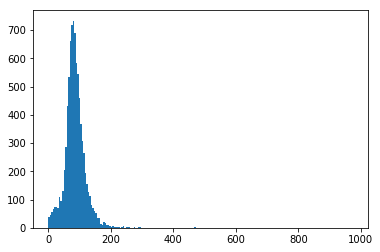

In [47]:
#plt.hist(df['Site EUI (kBtu/ft_2)'], bins=200)
plt.hist(df['Site EUI (kBtu/ft²)'][df['Site EUI (kBtu/ft²)']<1000], bins=200)
plt.show()

In [53]:
def clean(df):
    """Takes the logarithm of EUI for a particular building type and filters out
    examples that fall outside the threshold of two standard deviations.
    
    Returns outlier-free dataframe."""
    
    df = df[(df.log_eui<np.mean(df.log_eui)+2*np.std(df.log_eui))&(df.log_eui>np.mean(df.log_eui)-2*np.std(df.log_eui))]
    return df

df['eui'] = df['Site EUI (kBtu/ft²)']
df['log_eui'] = np.log10(df.eui)
df = clean(df)
print ('Examples after cleaning EUI:', len(df))

Examples after cleaning EUI: 8369


In [54]:
df['Site EUI (kBtu/ft²)'].describe()

count    8369.000000
mean       87.188804
std        29.988660
min        21.000000
25%        69.200000
50%        83.400000
75%       101.300000
max       304.800000
Name: Site EUI (kBtu/ft²), dtype: float64

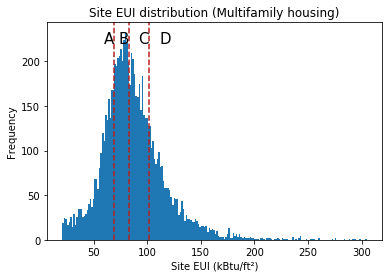

In [56]:
plt.hist(df['Site EUI (kBtu/ft²)'], bins=200)
for label, pos in zip(['A', 'B', 'C'], df['Site EUI (kBtu/ft²)'].describe()[4:7].values):
    plt.axvline(x=pos, color='firebrick', linestyle='--')
    plt.text(pos-10, 220, label, fontsize=15)
plt.text(pos+10, 220, 'D', fontsize=15)
plt.title('Site EUI distribution (Multifamily housing)')
plt.xlabel('Site EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.show()

In [60]:
census=pd.read_csv('Census tract data.csv')

In [63]:
census.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,...,MSMOC_TOT_,TAX_RET,Avg_TransC,REtaxperow,DISP_INC,energy_cos,REtax_ACS,AVG_TTL,LOCALNAME,Shape_Area
0,0,34,17,32400,34017032400,40.792844,-74.013482,New Jersey,Hudson County,2187,...,22740,2264.889916,4145.566539,4966.370331,12232.00950,1773.280152,7735,5007.444405,West New York Town,0.000036
1,1,34,17,10100,34017010100,40.691559,-74.110913,New Jersey,Hudson County,2255,...,27804,2363.430717,5969.286255,4490.984109,22077.84024,1876.844806,7917,6146.888195,Bayonne City,0.000106
2,2,34,17,10200,34017010200,40.682103,-74.104573,New Jersey,Hudson County,1218,...,28068,1260.718928,6014.489564,3339.224580,20488.60531,2167.175106,7692,6193.436421,Bayonne City,0.000031
3,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,22620,1229.562591,4798.787758,3793.386763,15514.61337,2163.964082,7831,4941.564294,Bayonne City,0.000108
4,4,34,17,10400,34017010400,40.670599,-74.089940,New Jersey,Hudson County,1571,...,20724,2209.874484,7611.970058,4478.110461,35131.00534,2114.480847,7918,7838.446154,Bayonne City,0.000234


In [99]:
zip_tract=pd.read_excel('ZIP_TRACT_122016.xlsx')

In [100]:
zip_tract.to_csv('ZIP_TRACT_122016.csv',encoding='utf-8')

In [101]:
zip_tract=pd.read_csv('ZIP_TRACT_122016.csv')

In [102]:
zip_tract.head()

,Unnamed: 0,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,0,501,36103158607,0.000000,1.000000,0.000000,1.000000
1,1,601,72001956600,0.136735,0.358911,0.347222,0.154270
2,2,601,72001956700,0.859996,0.636139,0.652778,0.842387
3,3,601,72001956300,0.003269,0.004950,0.000000,0.003343
4,4,602,72003430300,0.037744,0.272500,0.315789,0.055036


In [104]:
del zip_tract['Unnamed: 0']

In [105]:
zip_tract.head()

,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,0.000000,1.000000,0.000000,1.000000
1,601,72001956600,0.136735,0.358911,0.347222,0.154270
2,601,72001956700,0.859996,0.636139,0.652778,0.842387
3,601,72001956300,0.003269,0.004950,0.000000,0.003343
4,602,72003430300,0.037744,0.272500,0.315789,0.055036


In [128]:
tract=pd.merge(census,zip_tract,left_on=census.GEOID10, right_on=zip_tract.TRACT)

In [129]:
tract.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,...,REtax_ACS,AVG_TTL,LOCALNAME,Shape_Area,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,0,34,17,32400,34017032400,40.792844,-74.013482,New Jersey,Hudson County,2187,...,7735,5007.444405,West New York Town,0.000036,7093,34017032400,0.084513,0.098403,0.107687,0.087397
1,1,34,17,10100,34017010100,40.691559,-74.110913,New Jersey,Hudson County,2255,...,7917,6146.888195,Bayonne City,0.000106,7002,34017010100,0.078836,0.059420,0.090999,0.078735
2,2,34,17,10200,34017010200,40.682103,-74.104573,New Jersey,Hudson County,1218,...,7692,6193.436421,Bayonne City,0.000031,7002,34017010200,0.041207,0.054106,0.052094,0.043030
3,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,7831,4941.564294,Bayonne City,0.000108,7002,34017010300,0.042147,0.053623,0.043851,0.043030
4,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,7831,4941.564294,Bayonne City,0.000108,7305,34017010300,0.000000,0.000823,0.000000,0.000037


In [135]:
census_ny=tract[tract.STATEFP10==36]

In [136]:
census_ny.columns

Index(['FID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'INTPTLAT10',
       'INTPTLON10', 'State', 'COUNTY', 'HH_COUNT', 'OHU_OWN', 'OHU_RENT',
       'PERC_OWN', 'PERC_RENT', 'MHI', 'MED_VAL', 'HOUSINGCOS', 'MCR_ANNUAL',
       'MSMOC_TOT_', 'TAX_RET', 'Avg_TransC', 'REtaxperow', 'DISP_INC',
       'energy_cos', 'REtax_ACS', 'AVG_TTL', 'LOCALNAME', 'Shape_Area', 'ZIP',
       'TRACT', 'RES_RATIO', 'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO'],
      dtype='object')

In [142]:
drop=census_ny.drop(['OHU_OWN', 'OHU_RENT','PERC_OWN', 'PERC_RENT','MCR_ANNUAL',
       'MSMOC_TOT_', 'TAX_RET', 'Avg_TransC', 'REtaxperow', 'DISP_INC',
       'energy_cos', 'REtax_ACS', 'AVG_TTL', 'LOCALNAME', 'Shape_Area','RES_RATIO', 
                'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO' ],axis=1)

In [143]:
drop.columns

Index(['FID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'INTPTLAT10',
       'INTPTLON10', 'State', 'COUNTY', 'HH_COUNT', 'MHI', 'MED_VAL',
       'HOUSINGCOS', 'ZIP', 'TRACT'],
      dtype='object')

In [145]:
data=pd.merge(df,drop, left_on=df['Zip Code'],right_on=drop.ZIP)

In [146]:
data.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,MHI,MED_VAL,HOUSINGCOS,ZIP,TRACT
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.715160,-73.987331,New York,New York County,1537,93000,635100,10890.0726,10002,36061001401
1,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.709899,-73.985584,New York,New York County,1015,18831,0,4536.0000,10002,36061000201
2,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.721260,-73.981142,New York,New York County,1108,95125,968800,23489.1160,10002,36061002202
3,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.721006,-73.986839,New York,New York County,2462,64365,757200,17750.0526,10002,36061003001
4,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.710616,-73.981178,New York,New York County,3372,27288,452600,6729.8943,10002,36061000202


In [148]:
data=data.drop(['Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)','Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
       'District Hot Water Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'DOF Property Floor Area (ft²)', 'Property GFA - Self-reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Release Date', 'DEP Provided Water Use (kgal)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method'],axis=1)

In [149]:
data.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,MHI,MED_VAL,HOUSINGCOS,ZIP,TRACT
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.715160,-73.987331,New York,New York County,1537,93000,635100,10890.0726,10002,36061001401
1,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.709899,-73.985584,New York,New York County,1015,18831,0,4536.0000,10002,36061000201
2,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.721260,-73.981142,New York,New York County,1108,95125,968800,23489.1160,10002,36061002202
3,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.721006,-73.986839,New York,New York County,2462,64365,757200,17750.0526,10002,36061003001
4,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,40.710616,-73.981178,New York,New York County,3372,27288,452600,6729.8943,10002,36061000202
